In [7]:
import itertools
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Визуализация векторного поля стандартного случая

Имеем F = x''(t) * m = -k * x

Не теряя общности, предположим, что m/k = 1.

Тогда получаем дифференциальное уравнение вида x = x''(t)


In [4]:
x = sp.Function('x')
t, k, m = sp.symbols('t, k, m')
eq = sp.Eq(x(t).diff(t,t) * k, x(t) * -m)

In [8]:
sp.latex(eq)

'k \\frac{d^{2}}{d t^{2}} x{\\left(t \\right)} = - m x{\\left(t \\right)}'

In [10]:
sol_eq = sp.dsolve(eq).subs({k: 1, m: 1})

In [12]:
print(sp.latex(sol_eq))

x{\left(t \right)} = C_{1} e^{- i t} + C_{2} e^{i t}


In [ ]:
sol_x = sol_l = sol_eq.rhs
sol_dx = sp.diff(sol_l, t)
sol_ddx = sp.diff(sol_l, t, t)

In [ ]:
sol_x

C1*exp(-I*t) + C2*exp(I*t)

In [ ]:
sol_dx

-I*C1*exp(-I*t) + I*C2*exp(I*t)

In [ ]:
sol_ddx

-(C1*exp(-I*t) + C2*exp(I*t))

In [ ]:
x, y, dx, dy = [], [], [], []
for x0, dx0 in itertools.product(list(np.linspace(-10, 10, 40)), list(np.linspace(-10, 10, 40))):
    position = sp.solve([sol_x.subs(t, 0) - x0, sol_x.diff(t).subs(t, 0) - dx0])

    x.append(float(sol_l.subs(position).subs(t, 0)))
    y.append(float(sp.re(sol_dx.subs(position).subs(t, 0))))
    dx.append(float(sp.re(sol_dx.subs(position).subs(t, 0))))
    dy.append(float(sp.re(sol_ddx.subs(position).subs(t, 0))))

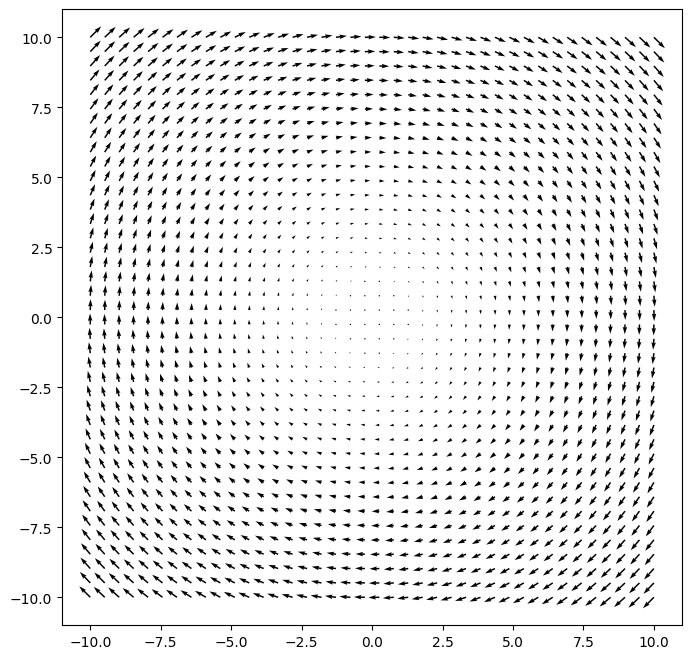

In [ ]:
fig, ax = plt.subplots()
ax.quiver(x, y, dx, dy)
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

# Визуализация векторного поля с демпингом

Добавляя демпинг в нашу систему имеем

F = x''(t) * m = -k * x + -b * x'(t)

x = x''(t) * -m/k + x'(t) * -b/k

In [13]:
x = sp.Function('x')
t, k, m, b = sp.symbols('t, k, m, b')
eq = sp.Eq(k*x(t), -m * x(t).diff(t,t) - b * x(t).diff(t))

In [14]:
print(sp.latex(eq))

k x{\left(t \right)} = - b \frac{d}{d t} x{\left(t \right)} - m \frac{d^{2}}{d t^{2}} x{\left(t \right)}


In [15]:
sol_eq = sp.dsolve(eq).subs({k: 1, m: 1, b: 0.5})

In [16]:
print(sp.latex(sol_eq))

x{\left(t \right)} = C_{1} e^{\frac{t \left(-0.5 + 1.93649167310371 i\right)}{2}} + C_{2} e^{- \frac{t \left(0.5 + 1.93649167310371 i\right)}{2}}


In [ ]:
sol_x = sol_eq.rhs
sol_dx = sp.diff(sol_x, t)
sol_ddx = sp.diff(sol_x, t, t)

In [ ]:
sol_x

C1*exp(t*(-0.5 + 1.93649167310371*I)/2) + C2*exp(-t*(0.5 + 1.93649167310371*I)/2)

In [ ]:
sol_dx

C1*(-0.25 + 0.968245836551854*I)*exp(t*(-0.5 + 1.93649167310371*I)/2) + C2*(-0.25 - 0.968245836551854*I)*exp(-t*(0.5 + 1.93649167310371*I)/2)

In [ ]:
sol_ddx

C1*(0.25 - 0.968245836551854*I)**2*exp(-t*(0.5 - 1.93649167310371*I)/2) + C2*(0.25 + 0.968245836551854*I)**2*exp(-t*(0.5 + 1.93649167310371*I)/2)

In [ ]:
x, y, dx, dy = [], [], [], []
for x0, dx0 in itertools.product(list(np.linspace(-10, 10, 40)), list(np.linspace(-10, 10, 40))):
    position = sp.solve([sol_x.subs(t, 0) - x0, sol_x.diff(t).subs(t, 0) - dx0])

    x.append(float(sol_l.subs(position).subs(t, 0)))
    y.append(float(sp.re(sol_dx.subs(position).subs(t, 0))))
    dx.append(float(sp.re(sol_dx.subs(position).subs(t, 0))))
    dy.append(float(sp.re(sol_ddx.subs(position).subs(t, 0))))

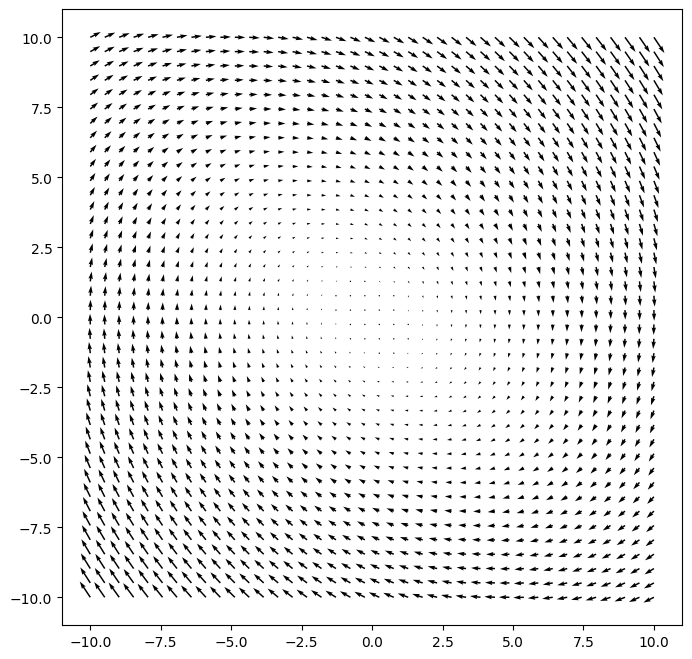

In [ ]:
fig, ax = plt.subplots()
ax.quiver(x, y, dx, dy)
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()